In [1]:
!nvidia-smi

Mon Feb 26 21:07:03 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   57C    P8             12W /  130W |     121MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Admin\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Admin\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Admin\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Admin\anaconda3\Lib\site-packages\setuptools\_v

In [3]:
!pip install opencv-python matplotlib albumentations

In [4]:
!pip install tensorflow

In [5]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Admin\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Admin\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Admin\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Admin\anaconda3\Lib\site-packages\setuptools\_v

In [6]:
import os
import time
import uuid
import cv2

In [7]:
IMAGES_PATH = os.path.join('data','images')
number_images = 0

In [8]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [9]:
!labelme

2024-02-26 21:07:23,374 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\Admin\.labelmerc


In [10]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [11]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
tf.config.list_physical_devices('GPU')

[]

In [13]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [14]:
!conda create --name gpu_env [python](https://saturncloud.io/glossary/python)=3.8


CondaValueError: invalid package specification: [python](https://saturncloud.io/glossary/python)=3.8



In [15]:
!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu123/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu123/torch_stable.html


In [16]:
!python -m ipykernel install --user --name gpu_env --display-name "Python (GPU)"

Installed kernelspec gpu_env in C:\Users\Admin\AppData\Roaming\jupyter\kernels\gpu_env


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [17]:
import torch
torch.cuda.is_available()

False

In [18]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [19]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [20]:
images = images.map(load_image)

In [21]:
images.as_numpy_iterator().next()

array([[[254, 244, 232],
        [254, 244, 232],
        [254, 244, 234],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 243, 231],
        [253, 243, 231],
        [254, 244, 234],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 242, 233],
        [255, 242, 233],
        [255, 242, 233],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 95,  37,  26],
        [ 99,  39,  28],
        [101,  37,  27],
        ...,
        [223, 227, 239],
        [223, 227, 239],
        [224, 228, 240]],

       [[ 90,  31,  15],
        [ 98,  39,  23],
        [103,  41,  26],
        ...,
        [223, 227, 239],
        [223, 227, 239],
        [223, 227, 239]],

       [[ 90,  32,  12],
        [ 92,  34,  14],
        [100,  41,  23],
        ...,
        [224, 228, 240],
        [224, 228, 240],
        [224, 228, 240]]

In [22]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [23]:

image_generator = images.batch(4).as_numpy_iterator()

In [24]:
plot_images = image_generator.next()

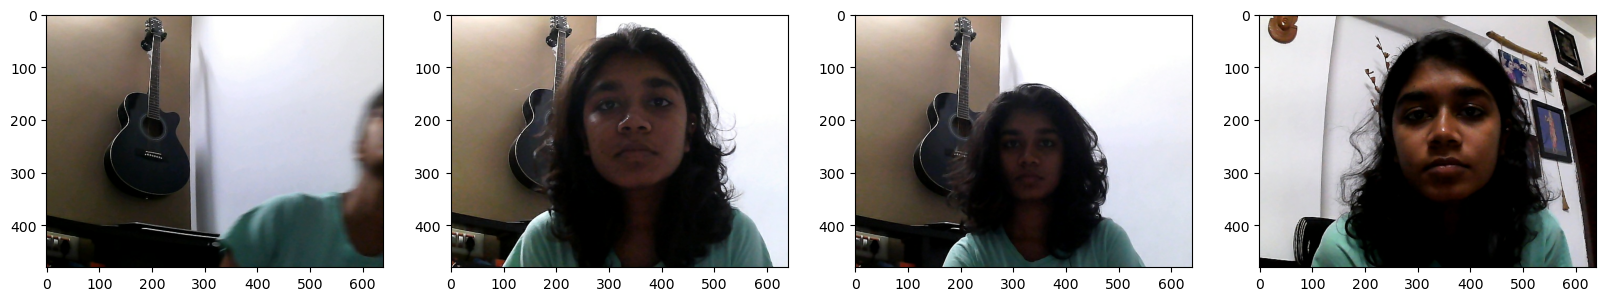

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [26]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)    

In [27]:
import albumentations as alb

In [28]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [29]:
img = cv2.imread(os.path.join('data','train', 'images','a18c0d07-d4b2-11ee-81f7-fc34974b73e1.jpg'))

In [30]:
with open(os.path.join('data', 'train', 'labels', 'a18c0d07-d4b2-11ee-81f7-fc34974b73e1.json'), 'r') as f:
    label = json.load(f)

In [31]:
label['shapes'][0]['points']

[[275.27777777777777, 161.66666666666669],
 [443.0555555555556, 331.6666666666667]]

In [32]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [33]:
coords

[275.27777777777777, 161.66666666666669, 443.0555555555556, 331.6666666666667]

In [34]:
coords = list(np.divide(coords, [640,480,640,480]))

In [35]:
coords

[0.4301215277777778,
 0.3368055555555556,
 0.6922743055555556,
 0.6909722222222222]

In [36]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [37]:
augmented['bboxes']

[(0.3487654320987654,
  0.31259259259259264,
  0.721604938271605,
  0.6903703703703704)]

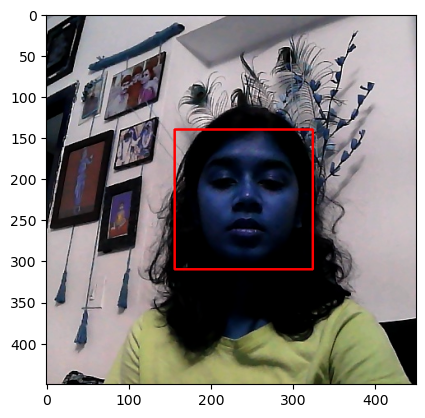

In [38]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [40]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

y_max is less than or equal to y_min for bbox [0.9058159722222221, 0.6215277777777778, 0.9984375, 0.30681376941457567, 'face'].


In [41]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [42]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [43]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [44]:
train_images.as_numpy_iterator().next()

array([[[0.15447304, 0.33278185, 0.24460784],
        [0.16029412, 0.32928923, 0.2521446 ],
        [0.1504902 , 0.32696077, 0.24607843],
        ...,
        [0.43223038, 0.13547795, 0.01721814],
        [0.42414215, 0.13511029, 0.03253676],
        [0.21789216, 0.13976716, 0.07604167]],

       [[0.15655637, 0.33645833, 0.27126226],
        [0.16525735, 0.33082107, 0.28431374],
        [0.15827206, 0.33082107, 0.27297795],
        ...,
        [0.38333333, 0.15655637, 0.04129902],
        [0.38535538, 0.15104167, 0.03045343],
        [0.2088848 , 0.11924019, 0.05508579]],

       [[0.17028186, 0.3398897 , 0.28547794],
        [0.19068627, 0.33854166, 0.30667892],
        [0.19166666, 0.35281864, 0.2920956 ],
        ...,
        [0.09859069, 0.05392157, 0.01488971],
        [0.15502451, 0.09773284, 0.0338848 ],
        [0.11691176, 0.09417892, 0.06017157]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [45]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [46]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [47]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [48]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [49]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2307, 0.3154, 0.5767, 0.725 ], dtype=float16))

In [50]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3720, 3720, 840, 840, 780, 780)

In [51]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [52]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [53]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [57]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.0949, 0.3752, 0.512 , 0.879 ],
        [0.17  , 0.2678, 0.417 , 0.621 ],
        [0.2646, 0.2778, 0.5903, 0.6357],
        [0.091 , 0.306 , 0.4639, 0.6836],
        [0.4739, 0.3362, 0.769 , 0.7153],
        [0.566 , 0.3525, 0.8584, 0.7256],
        [0.381 , 0.2847, 0.682 , 0.624 ],
        [0.2399, 0.278 , 0.541 , 0.6177]], dtype=float16))

In [58]:
data_samples = train.as_numpy_iterator()

In [59]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


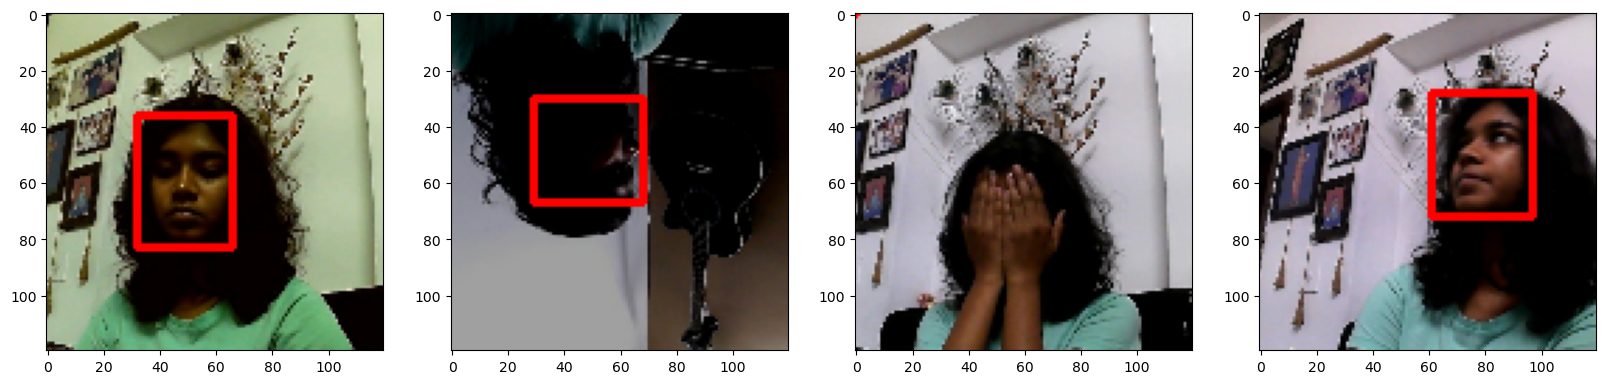

In [60]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [61]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [62]:
vgg = VGG16(include_top=False)



58889256/58889256 [==============================] - 36s 1us/step


In [63]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [64]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [65]:
facetracker = build_model()

In [66]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [67]:
X, y = train.as_numpy_iterator().next()

In [68]:
X.shape

(8, 120, 120, 3)

In [69]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 718ms/step


In [70]:
classes, coords

(array([[0.3592657 ],
        [0.33591527],
        [0.32813463],
        [0.38752243],
        [0.33868542],
        [0.35424107],
        [0.3848536 ],
        [0.38805774]], dtype=float32),
 array([[0.50934905, 0.3744589 , 0.31994843, 0.4710173 ],
        [0.55358577, 0.4163657 , 0.3904392 , 0.41046146],
        [0.64314544, 0.4422972 , 0.39852855, 0.4140662 ],
        [0.5918733 , 0.41650635, 0.30338323, 0.4757903 ],
        [0.531067  , 0.45413294, 0.25447026, 0.5266638 ],
        [0.55837214, 0.41916275, 0.346239  , 0.49128884],
        [0.5971591 , 0.38571796, 0.3189763 , 0.45097205],
        [0.56036496, 0.38780648, 0.31326267, 0.48815367]], dtype=float32))

In [71]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [73]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [74]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [75]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [76]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.7361526>

In [77]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6081848>

In [78]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.7361526>

In [79]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [80]:
model = FaceTracker(facetracker)

In [81]:
model.compile(opt, classloss, regressloss)

In [82]:
logdir='logs'

In [83]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [84]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
465/465 [==============================] - 268s 564ms/step - total_loss: 0.2756 - class_loss: 0.0895 - regress_loss: 0.2308 - val_total_loss: 0.0673 - val_class_loss: 0.0023 - val_regress_loss: 0.0661
Epoch 2/10
465/465 [==============================] - 272s 581ms/step - total_loss: 0.0405 - class_loss: 0.0059 - regress_loss: 0.0375 - val_total_loss: 0.5480 - val_class_loss: 0.7207 - val_regress_loss: 0.1877
Epoch 3/10
465/465 [==============================] - 275s 587ms/step - total_loss: 0.0209 - class_loss: 0.0022 - regress_loss: 0.0198 - val_total_loss: 0.0993 - val_class_loss: 2.3363e-04 - val_regress_loss: 0.0992
Epoch 4/10
465/465 [==============================] - 267s 569ms/step - total_loss: 0.0215 - class_loss: 0.0048 - regress_loss: 0.0191 - val_total_loss: 0.0216 - val_class_loss: 7.8195e-05 - val_regress_loss: 0.0216
Epoch 5/10
465/465 [==============================] - 264s 563ms/step - total_loss: 0.0113 - class_loss: 0.0011 - regress_loss: 0.0107 - val_tot

In [85]:
hist.history

{'total_loss': [0.08710514008998871,
  0.0427883118391037,
  0.03742006793618202,
  0.015840593725442886,
  0.008363352157175541,
  0.003966354764997959,
  0.004243136383593082,
  0.0022149900905787945,
  0.0036464266013354063,
  0.003214349737390876],
 'class_loss': [0.010643452405929565,
  0.0013388409279286861,
  0.00010455559095134959,
  4.441654891707003e-05,
  0.002750466577708721,
  1.4543729776050895e-05,
  1.2390450137900189e-05,
  6.147126987343654e-05,
  1.2777910342265386e-05,
  1.976681778614875e-05],
 'regress_loss': [0.08178341388702393,
  0.04211889207363129,
  0.037367790937423706,
  0.015818385407328606,
  0.00698811886832118,
  0.0039590829983353615,
  0.00423694122582674,
  0.002184254350140691,
  0.003640037728473544,
  0.0032044663093984127],
 'val_total_loss': [0.067255400121212,
  0.5480321049690247,
  0.0993131622672081,
  0.021612418815493584,
  0.00607915036380291,
  0.005384833551943302,
  0.002484086900949478,
  0.00492794718593359,
  2.7960572242736816,
  

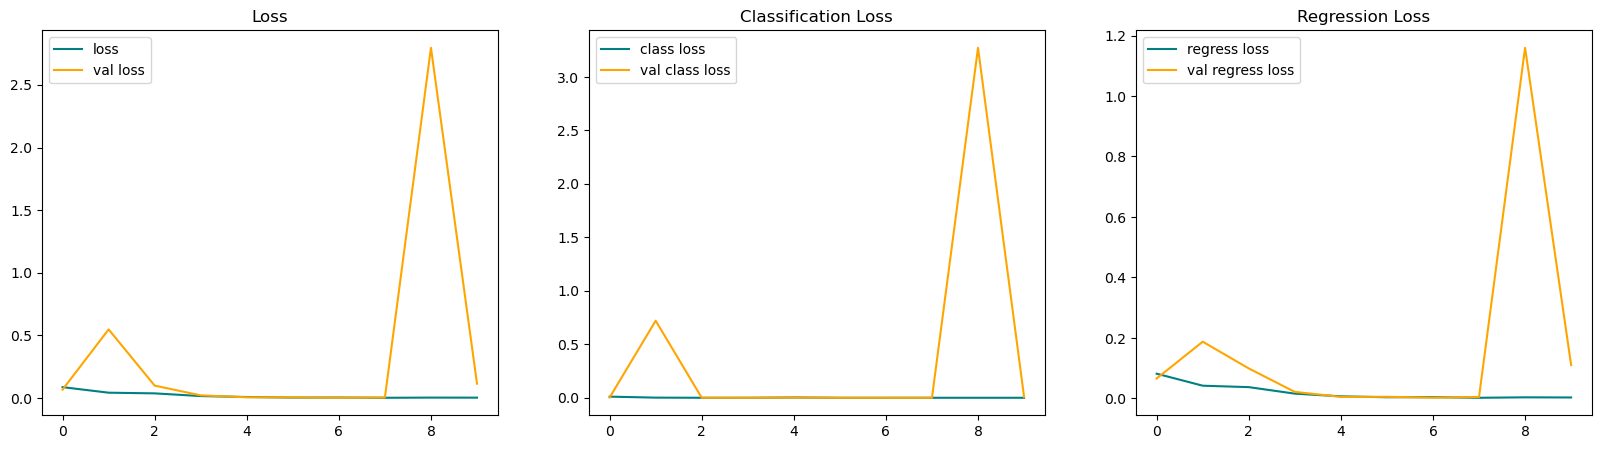

In [102]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [103]:
test_data = test.as_numpy_iterator()

In [104]:
test_sample = test_data.next()

In [105]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 244ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


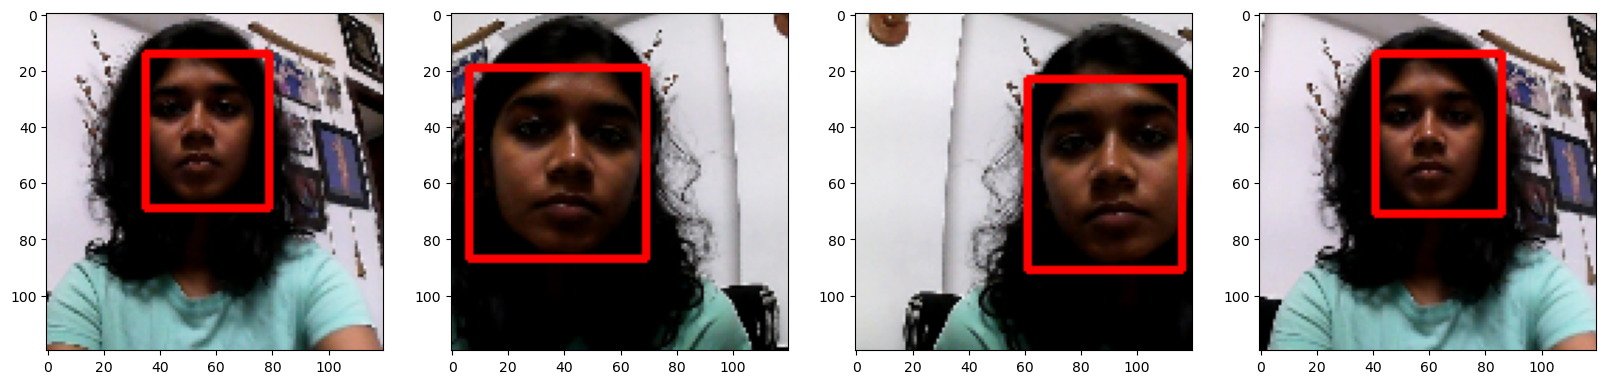

In [106]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [107]:
from tensorflow.keras.models import load_model

In [108]:
facetracker.save('facetracker.h5')

In [109]:
facetracker = load_model('facetracker.h5')

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()